In [1]:
#..MODIFIED BY CHUYAN at Feb.15th, this file was intended to re-plot some former figures in a better way

import netCDF4
from numpy import *
import matplotlib.pyplot as plt
import xarray as xr
import PyNIO as Nio
import pandas as pd
import glob
from scipy.stats import *
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm


import seaborn as sns

In [2]:
deck_nas  = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0']
#..deck_nas  =    ['CESM2']


ACCESSCM2 = {'modn': 'ACCESS-CM2', 'consort': 'CSIRO-ARCCSS', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#..dont have 'clwvi' variable, even in esgf-node website
BCCESM1 = {'modn': 'BCC-ESM1', 'consort': 'BCC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CAMSCSM1 = {'modn': 'CAMS-CSM1-0', 'consort': 'CAMS', 'cmip': 'cmip6',
        'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CanESM5 = {'modn': 'CanESM5', 'consort': 'CCCma', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2 = {'modn': 'CESM2', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CESM2FV2 = {'modn': 'CESM2-FV2', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

CESM2WACCM = {'modn': 'CESM2-WACCM', 'consort': 'NCAR', 'cmip': 'cmip6',
         'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
CNRMCM6 = {'modn': 'CNRM-CM6-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}# time doesn't corresponding for 'evspsbl' in  'pi-Control' exper
CNRMESM2 = {'modn': 'CNRM-ESM2-1', 'consort': 'CNRM-CERFACS', 'cmip': 'cmip6', 
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gr', "typevar": 'Amon'}
E3SM10 = {'modn': 'E3SM-1-0', 'consort': 'E3SM-Project', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}
FGOALSg3 = {'modn': 'FGOALS-g3', 'consort': 'CAS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GFDLCM4 = {'modn': 'GFDL-CM4', 'consort': 'NOAA-GFDL', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
# repaired Dec.30th

GISSE21G = {'modn': 'GISS-E2-1-G', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
GISSE21H = {'modn': 'GISS-E2-1-H', 'consort': 'NASA-GISS', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}

HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
           'exper': 'abrupt-4xCO2', 'ensmem': 'r1i1p1f3', 'gg': 'gn', "typevar": 'Amon'}   #  Be careful, failure due to 'day time representation'
HADGEM3 = {'modn': 'HadGEM3-GC31-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
            'exper': 'piControl', 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}   #..missing 'wap' in 'piControl' exp

INM_CM48 = {'modn': 'INM-CM4-8', 'consort': 'INM', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}
INM_CM50 = {'modn': 'INM-CM5-0', 'consort': 'INM', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr1', "typevar": 'Amon'}#..'/glade/' dont have 'Amon' typevar

IPSLCM6ALR = {'modn': 'IPSL-CM6A-LR', 'consort': 'IPSL', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}

MPIESM12LR = {'modn': 'MPI-ESM1-2-LR', 'consort': 'MPI-M', 'cmip': 'cmip6',
              'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MIROC6 = {'modn': 'MIROC6', 'consort': 'MIROC', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
MIROCES2L= {'modn': 'MIROC-ES2L', 'consort': 'MIROC', 'cmip': 'cmip6',
          'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}   # dont have
MRIESM20 = {'modn': 'MRI-ESM2-0', 'consort': 'MRI', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}
NORESM2LM = {'modn': 'NorESM2-LM', 'consort': 'NCC', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}# 'pr' variable start at 130th yr in 'abrupt-4xCO2', while other variable start at 0th yr

SAM0={'modn': 'SAM0-UNICON', 'consort': 'SNU', 'cmip': 'cmip6',
            'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}


UKESM10 = {'modn': 'UKESM1-0-LL', 'consort': 'MOHC', 'cmip': 'cmip6',
           'exper': exp, 'ensmem': 'r1i1p1f2', 'gg': 'gn', "typevar": 'Amon'}   # the same day time representation issue as 'HadGEM3'
AWICM11MR = {'modn': 'AWI-CM-1-1-MR', 'consort': 'AWI', 'cmip': 'cmip6',
             'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'}#..'abrupt-4xCO2' missing variables
CMCC = {'modn': 'CMCC-CM2-SR5', 'consort': 'CMCC', 'cmip': 'cmip6',
        'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'} #..'/glade/' dont have 'abrupt-4xCO2'/'piControl' exper
ECE = {'modn': 'EC-Earth3', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gn', "typevar": 'Amon'} #..dont have 'Amon' or variable 'tas'
#ECE has different variants for exper
ECEV = {'modn': 'EC-Earth3-Veg', 'consort': 'EC-Earth-Consortium', 'cmip': 'cmip6',
       'exper': exp, 'ensmem': 'r1i1p1f1', 'gg': 'gr', "typevar": 'Amon'}#..too hard to operate
#ECEV has very discrete year in 'abrupt-4xCO2', seems continued but each in one yr file in 'piControl'


In [3]:
deck2 = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM2, GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0, E3SM10, FGOALSg3, GFDLCM4, CAMSCSM1,INM_CM48, MPIESM12LR]   #..current # 18 
deck_nas2 = ['BCCESM1', 'CanESM5', 'CESM2', 'CESM2FV2', 'CESM2WACCM', 'CNRMESM2', 'GISSE21G', 'GISSE21H', 'IPSLCM6ALR', 'MRIESM20', 'MIROC6', 'SAM0', 'E3SM10', 'FGOALSg3', 'GFDLCM4', 'CAMSCSM1','INM_CM48', 'MPIESM12LR']
#.. 17 models now

path1 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/'
path6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Plots_proposal/'

In [4]:
## PLot 1 # read data for ordinary, 1-lrm(not best):

deck  = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM2, E3SM10, GFDLCM4,GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0]
#deck   =  [CESM2]
output_ARRAY = {}
output_intermedia = {}
output_GMT =  {}
output_2lrm_predict  = {}
output_2lrm_report   = {}

output_dict0_PI =  {}
output_dict0_abr = {}
output_LRM_le = {}
output_LRM_lt = {}

shape_yr_modelPI =  {}
shape_yr_modelabr = {}

output_2lrm_flavra_abr =  {}
output_2lrm_flavra_PI  =  {}   # was monthly data in this case
output_2lrm_yr_bin_abr =  {}
output_2lrm_yr_bin_PI  =  {}
output_2lrm_mon_bin_abr =  {}
output_2lrm_mon_bin_PI  =  {}

output_2lrm_mon_bin_LWPpredi_PI =  {}
output_2lrm_mon_bin_LWPpredi_abr = {}

Tr_sst =  0.0


for i in range(len(deck2)):
    
    output_ARRAY[deck_nas2[i]] =  load(path1+deck2[i]['modn']+'mond_'+str(Tr_sst)+'_dats.npz', allow_pickle=True)  #+'_'+str(Tr_sst)
    output_intermedia[deck_nas2[i]]  = output_ARRAY[deck_nas2[i]]['rawdata_dict']
    
    output_GMT[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['GMT']
    output_2lrm_predict[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['predict_lwp']
    output_2lrm_report[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['report_lwp']

    output_dict0_PI[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict0_PI_var']
    output_dict0_abr[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict0_abr_var']
    shape_yr_modelPI[deck_nas2[i]]   =  output_dict0_PI[deck_nas2[i]]['shape_yr']
    shape_yr_modelabr[deck_nas2[i]]   =  output_dict0_abr[deck_nas2[i]]['shape_yr']
    output_LRM_le[deck_nas2[i]] =  output_intermedia[deck_nas2[i]][()]['LRM_le']
    output_LRM_lt[deck_nas2[i]] =  output_intermedia[deck_nas2[i]][()]['LRM_st']
    
    # Flattened monthly data
    output_2lrm_flavra_PI[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict2_predi_fla_PI']
    output_2lrm_flavra_abr[deck_nas2[i]]  =   output_intermedia[deck_nas2[i]][()]['dict2_predi_fla_abr']
    # monthly data
    output_2lrm_mon_bin_PI[deck_nas2[i]]  =   output_dict0_PI[deck_nas2[i]]['dict1_mon_bin_PI']
    output_2lrm_mon_bin_abr[deck_nas2[i]]  =  output_dict0_abr[deck_nas2[i]]['dict1_mon_bin_abr']
    # Annually data
    output_2lrm_yr_bin_PI[deck_nas2[i]]  =   output_dict0_PI[deck_nas2[i]]['dict1_yr_bin_PI']
    output_2lrm_yr_bin_abr[deck_nas2[i]]  =  output_dict0_abr[deck_nas2[i]]['dict1_yr_bin_abr']

    # Predicted monthly data
    output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[i]] =  output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_PI']
    output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[i]] = output_intermedia[deck_nas2[i]][()]['LWP_predi_bin_abr']
    


print(shape_yr_modelPI, shape_yr_modelabr)

{'BCCESM1': 99, 'CanESM5': 99, 'CESM2': 99, 'CESM2FV2': 99, 'CESM2WACCM': 99, 'CNRMESM2': 99, 'GISSE21G': 99, 'GISSE21H': 99, 'IPSLCM6ALR': 99, 'MRIESM20': 99, 'MIROC6': 99, 'SAM0': 99, 'E3SM10': 99, 'FGOALSg3': 99, 'GFDLCM4': 99, 'CAMSCSM1': 99, 'INM_CM48': 99, 'MPIESM12LR': 99} {'BCCESM1': 151, 'CanESM5': 151, 'CESM2': 300, 'CESM2FV2': 150, 'CESM2WACCM': 150, 'CNRMESM2': 150, 'GISSE21G': 151, 'GISSE21H': 151, 'IPSLCM6ALR': 300, 'MRIESM20': 151, 'MIROC6': 150, 'SAM0': 150, 'E3SM10': 150, 'FGOALSg3': 152, 'GFDLCM4': 150, 'CAMSCSM1': 150, 'INM_CM48': 150, 'MPIESM12LR': 165}


In [5]:
## PLot 1' # read data for best fit, 4-lrm:

# deck  = [BCCESM1, CanESM5, CESM2, CESM2FV2, CESM2WACCM, CNRMESM2, E3SM10, GFDLCM4,GISSE21G, GISSE21H, IPSLCM6ALR, MRIESM20, MIROC6, SAM0]
#deck   =  [CESM2]

output_ARRAY_best4 = {}
output_intermedia_best4 = {}

output_dict0_PI_best4 =  {}
output_dict0_abr_best4 = {}

output_LRM_sstlt_up = {}
output_LRM_sstle_up = {}
output_LRM_sstlt_down = {}
output_LRM_sstle_down = {}


output_4lrm_predict  = {}
output_4lrm_report   = {}

# BIN Datas:
output_4lrm_flavra_PI =  {}
output_4lrm_flavra_abr = {}

output_4lrm_yr_bin_abr =  {}
output_4lrm_yr_bin_PI  =  {}
output_4lrm_mon_bin_abr =  {}
output_4lrm_mon_bin_PI  =  {}

output_4lrm_mon_bin_LWPpredi_PI =  {}
output_4lrm_mon_bin_LWPpredi_abr = {}

# Tr_sst =  0.0
# TR_sub  =  0.0

for j in range(len(deck2)):
    
    folder_4lrm =  glob.glob(path1 +deck2[j]['modn']+'_best(test5)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_4lrm)
    
    output_ARRAY_best4[deck_nas2[j]] =  load(folder_4lrm[0], allow_pickle=True)  # str(TR_sst)+str(TR_sub) 
    output_intermedia_best4[deck_nas2[j]]  = output_ARRAY_best4[deck_nas2[j]]['rawdata_dict']
    

    output_4lrm_predict[deck_nas2[j]]  =   output_intermedia_best4[deck_nas2[j]][()]['predict_lwp']
    output_4lrm_report[deck_nas2[j]]  =   output_intermedia_best4[deck_nas2[j]][()]['report_lwp']
    
    output_dict0_PI_best4[deck_nas2[j]]  =   output_intermedia_best4[deck_nas2[j]][()]['dict0_PI_var']
    output_dict0_abr_best4[deck_nas2[j]]  =   output_intermedia_best4[deck_nas2[j]][()]['dict0_abr_var']
    output_LRM_sstlt_up[deck_nas2[j]] =  output_intermedia_best4[deck_nas2[j]][()]['LRM_sstlt_up']
    output_LRM_sstle_up[deck_nas2[j]] =  output_intermedia_best4[deck_nas2[j]][()]['LRM_sstle_up']
    output_LRM_sstlt_down[deck_nas2[j]] =  output_intermedia_best4[deck_nas2[j]][()]['LRM_sstlt_down']
    output_LRM_sstle_down[deck_nas2[j]] =  output_intermedia_best4[deck_nas2[j]][()]['LRM_sstle_down']
    
   
    # Flattened monthly data
    output_4lrm_flavra_PI[deck_nas2[j]]  =   output_intermedia_best4[deck_nas2[j]][()]['dict2_predi_fla_PI']
    output_4lrm_flavra_abr[deck_nas2[j]]  =   output_intermedia_best4[deck_nas2[j]][()]['dict2_predi_fla_abr']
    
    # monthly data
    output_4lrm_mon_bin_PI[deck_nas2[j]]  =   output_dict0_PI_best4[deck_nas2[j]]['dict1_mon_bin_PI']
    output_4lrm_mon_bin_abr[deck_nas2[j]]  =  output_dict0_abr_best4[deck_nas2[j]]['dict1_mon_bin_abr']
    # Annually data
    output_4lrm_yr_bin_PI[deck_nas2[j]]  =   output_dict0_PI_best4[deck_nas2[j]]['dict1_yr_bin_PI']
    output_4lrm_yr_bin_abr[deck_nas2[j]]  =  output_dict0_abr_best4[deck_nas2[j]]['dict1_yr_bin_abr']

    # Predicted monthly data
    output_4lrm_mon_bin_LWPpredi_PI[deck_nas2[j]] =  output_intermedia_best4[deck_nas2[j]][()]['LWP_predi_bin_PI']
    output_4lrm_mon_bin_LWPpredi_abr[deck_nas2[j]] = output_intermedia_best4[deck_nas2[j]][()]['LWP_predi_bin_abr']
    


['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/BCC-ESM1_best(test5)fit_270.46K_ud-0.2_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CanESM5_best(test5)fit_268.7K_ud-0.0_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2_best(test5)fit_271.79K_ud1.0_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2-FV2_best(test5)fit_269.39K_ud1.3_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2-WACCM_best(test5)fit_271.88K_ud1.0_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CNRM-ESM2-1_best(test5)fit_262.63K_ud-1.9_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/GISS-E2-1-G_best(test5)fit_271.43K_ud-0.1_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/GISS-E2-1-H_best(test5)fit_275.17K_ud0.8_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/IPSL-CM6A-LR_best(test5)fit_263.5K_ud0.2_dats.npz']
['/glade/work/chuyan/Research/C

151


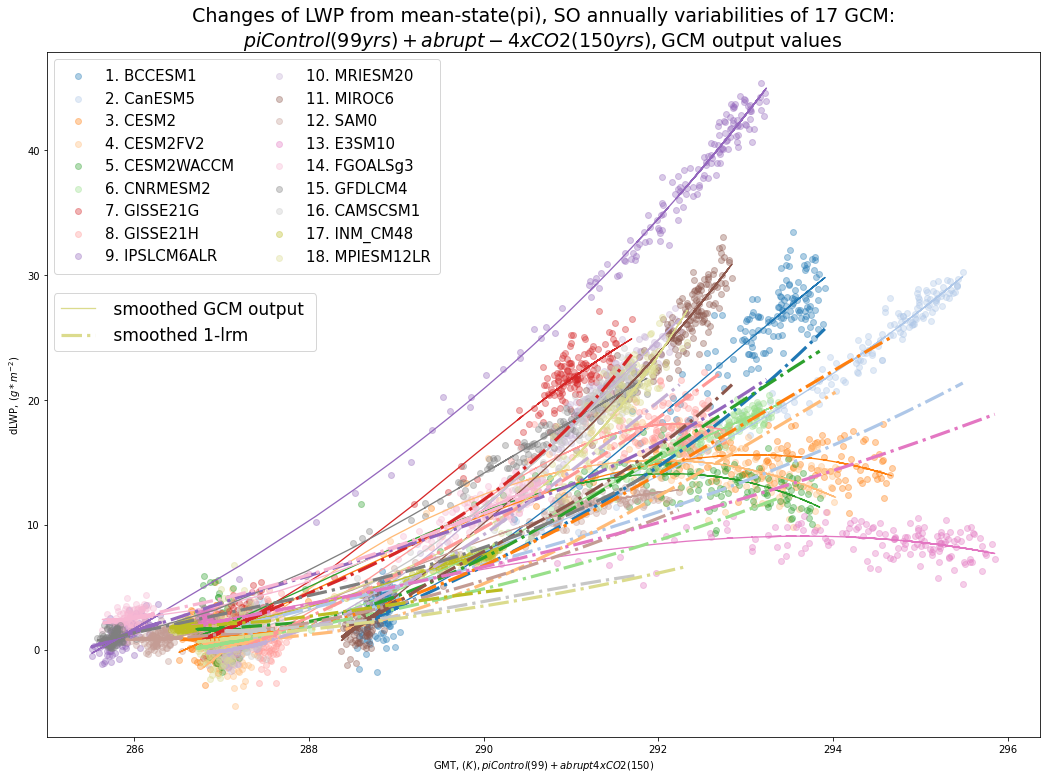

In [6]:
## PLot 1,2 #...pi-C + Abr Plot:

fig5, ax5  = plt.subplots(1, 1, figsize =(17.8, 12.6))  #(16.2, 9.3))
#ax4  = plt.axes()
parameters = {'axes.labelsize': 23, 'legend.fontsize': 15,
          'axes.titlesize': 19, 'xtick.labelsize': 21, 'ytick.labelsize':21}
plt.rcParams.update(parameters)


# These are the colors that will be used in the plot
my_colors= array([
        '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
        '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
        '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
        '#17becf', '#9edae5'])   #..plt.rcParams['axes.prop_cycle']()

my_colorst= my_colors


output_dabrmeanpi_report = {}
output_dabrmeanpi_predict = {}
print(shape_yr_modelabr[deck_nas2[6]])
output_yrs = {}
# add a random value(s=1) to make line separate a little bit
at = random.rand(18)* 3.0
# print(at, at.shape)
plot_lines1 = []

plot_lines2 = []

for a in range(len(deck2)):
    
    GMT = 0
    Yrs = 0
    GMT_pxy = 0
    
    # if deck_nas2[a]=='INM_CM48':   #..BCCESM1
    #if (deck_nas2[a] == 'E3SM10') or (deck_nas2[a]== 'BCCESM1') or (deck_nas2[a] =='GFDLCM4'): 
    ##..if deck_nas2[a]=='BCCESM1' or deck_nas2[a]=='CanESM5' or deck_nas2[a]=='GISSE21H' or deck_nas2[a]=='GISSE21G':
    
    output_yrs[deck_nas2[a]]  = arange(shape_yr_modelPI[deck_nas2[a]] + shape_yr_modelabr[deck_nas2[a]])
    output_dabrmeanpi_report[deck_nas2[a]] = output_2lrm_report[deck_nas2[a]][0:] - mean(output_2lrm_report[deck_nas2[a]][0:shape_yr_modelPI[deck_nas2[a]]])
    output_dabrmeanpi_predict[deck_nas2[a]] = output_2lrm_predict[deck_nas2[a]][0:] - mean(output_2lrm_predict[deck_nas2[a]][0:shape_yr_modelPI[deck_nas2[a]]])


    ax5.scatter(output_GMT[deck_nas2[a]][0:249], 1000.*output_dabrmeanpi_report[deck_nas2[a]][0:249] +at[a], alpha = .35, c= my_colors[a], label = str(a+1)+'. '+deck_nas2[a], zorder=0)   #.., label='report change'+deck_nas2[a]
    # l2, = ax5.plot(output_GMT[deck_nas2[a]][0:249], 1000*output_dabrmeanpi_predict[deck_nas2[a]][0:249], c = my_colors[a]) #.., label='predict change: '+deck_nas2[a]+ f': 2LRM: TR_sst= {Tr_sst}K' 
    
    #plt.scatter(output_GMT[deck_nas2[a]][0: 248], output_report[deck_nas2[a]][0: 248], label='reported LWP: ' + deck_nas2[a])
    #plt.plot(output_GMT[deck_nas2[a]][0: 248], output_predict[deck_nas2[a]][0: 248], label = 'predict LWP: ' + deck_nas2[a])

    GMT = output_GMT[deck_nas2[a]][0:249]
    Yrs = output_yrs[deck_nas2[a]][0:249]
    
    GMT_pxy = linspace(min(GMT[99:249]), max(GMT[99:249]), 150)
    GMT_pxy = append(GMT[0:99], GMT_pxy)
    
    
    parameter = polyfit(GMT[0:249], output_dabrmeanpi_report[deck_nas2[a]][0:249],3)
    #z1  = poly1d(parameter)
    #print(z1)
    y2 = parameter[0]*GMT**3 + parameter[1]*GMT**2 +parameter[2]*GMT + parameter[3]
    l1, = ax5.plot(GMT, 1000.* y2+at[a], alpha = 1, linewidth= 1.3,  c = my_colors[a], zorder =1) # , label='Best fit of '+ deck_nas2[a]
    plot_lines1.append(l1)
    
    parameter2 = polyfit(GMT[0:249], output_dabrmeanpi_predict[deck_nas2[a]][0:249], 3)
    y3 = parameter2[0]*GMT_pxy**3 + parameter2[1]*GMT_pxy**2 +parameter2[2]*GMT_pxy +parameter2[3]
    l2, = ax5.plot(GMT_pxy, 1000.* y3 +at[a], alpha = 1, linewidth = 3.20, linestyle='-.', c = my_colors[a], zorder= 2)
    plot_lines2.append(l2)
    

plt.xlabel('GMT, '+ r'$(K), piControl(99)+ abrupt4xCO2(150)$' )
plt.ylabel('dLWP, '+r'$( g*m^{-2})$' )
plt.title("Changes of LWP from mean-state(pi): Actual, 2-LRM and the ployfit ")
plt.title(" Changes of LWP from mean-state(pi), SO annually variabilities of 17 GCM: \n"+r'$piControl(99 yrs) + abrupt-4xCO2(150 yrs),$'+ "GCM output values")#  v.s. 1-lrm regressed value

legend1 = plt.legend([ plot_lines1[-1], plot_lines2[-1]], [ ' smoothed GCM output ', ' smoothed 1-lrm '], loc='upper right', bbox_to_anchor=(0.28, 0.66), fontsize= 17) # bboxtoanchor(argu: x, y, width, height) 
plt.legend(loc='upper left', ncol =2, borderpad=0.6)  # 
plt.gca().add_artist(legend1)



#plt.savefig("Badbehaviormodel_dLWP_over_yrs(pi+abr)_270K")
#...best fit plot
#..plt.savefig("badbehaviormodel_TR_sst= 0K_2lrm", dpi= 500)
#plt.savefig('Variabilities of liquid-cloud-amount_pi+abr_2lrm_273K_mon')


# plt.savefig(path6+"plot1_GCMs_LWP_variability", dpi =500)
# plt.savefig(path6+"plot2_simgle_regime_LRM_performance_withoutGCMfit", dpi=500)

In [8]:
## PLot 3: coefficient plot for 0k(1-LRM) OR 2-lrm

# calc data (monthly) standard deviation:

sigma1 = full((len(deck2), 4), 0.0)
sigma2 = full((len(deck2), 4), 0.0)

coef1 =  []
coef2 =  []

stcoef1 = full((len(deck2), 4), 0)
stcoef2 = full((len(deck2), 4), 0)

for i in range(len(deck2)):
    
    ind1 = isnan(output_2lrm_flavra_PI[deck_nas2[i]]['LTS'])==False

    ind_true = nonzero(ind1==True)
    ind_false = nonzero(ind1==False)
    #..Sign the the indexing into YB, or YB value will have a big changes
    # print('shape2: ', array(ind_true).shape)        # shape2
    #  print(argwhere(isnan(dict2_predi_fla_PI['LTS'][ind_true])==True))
    
    '''
    ## TR_sst, TR_sub
    folder_4lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test3)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_4lrm)
    index_st_sst = folder_4lrm[0].index('fit') +4

    index_ed_sst = folder_4lrm[0].index('K')
    print(list(folder_4lrm[0])[index_st_sst +4], list(folder_4lrm[0])[index_ed_sst])
    index_st_sub  = folder_4lrm[0].index('_ud') +4
    index_ed_sub  = folder_4lrm[0].index('_dats')

    TR_sst = float(str(folder_4lrm[0])[index_st_sst:index_ed_sst])
    TR_sub = float(str(round(float(str(folder_4lrm[0][index_st_sub:index_ed_sub])) *0.01, 5)))

    print('TR_sst= ', TR_sst)
    print('TR_sub= ', TR_sub)
    '''
    
    # start calculating SD of CCFs on monthly scale:

    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    TR_sst = 0.0
    
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sst_le  = nonzero(output_2lrm_flavra_PI[deck_nas2[i]]['SST'] >= TR_sst)
    ind_sst_st  = nonzero(output_2lrm_flavra_PI[deck_nas2[i]]['SST'] <  TR_sst)
    

    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7  = intersect1d(ind_true, ind_sst_le)
    # print('shape7: ', ind7.shape)   #.. points, shape7
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8 = intersect1d(ind_true, ind_sst_st)
    # print('shape8: ', ind8.shape)   #.. points, shape8
    
    
    ## calc standard_deviation for CCFs at PI:
    sigma1[i,:]  = array([nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['SST'][ind7]), nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['p_e'][ind7]), 
                          nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['LTS'][ind7]), nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['SUB'][ind7])])

    sigma2[i,:]  = array([nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['SST'][ind8]), nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['p_e'][ind8]), 
                          nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['LTS'][ind8]), nanstd(output_2lrm_flavra_PI[deck_nas2[i]]['SUB'][ind8])])

# print(sigma1.shape, sigma2)
## switch 'nan' points to 0
ind_sg1 = isnan(sigma2)== True
ind_sgtrue = nonzero(ind_sg1==True)
sigma2[ind_sgtrue] = 0.0



# Retrieved the 1/2-lrm coefficients:

for j in range(len(deck2)):
    m  = output_LRM_le[deck_nas2[j]][0].copy()
    t  = output_LRM_lt[deck_nas2[j]][0].copy()
    # print(m, t)
    coef1.append(array(m))
    coef2.append(array(t))
    
print(array(coef1).shape)

# product of monthly variations and coefficients
stcoef1 = (1000.*array(coef1)) * sigma1[i,:]
stcoef2 = (1000.*array(coef2)) * sigma2[i,:]

print(stcoef1.shape, stcoef1)

(18, 4)
(18, 4) [[ 4.89089681e+01  4.25882766e+01 -6.85005166e+00  2.28439574e+00]
 [ 3.25217538e+01  1.45956612e+01 -3.59569863e+00  9.34043373e+00]
 [ 5.09573335e+01  1.03577883e+01 -2.14830805e+00  5.12788775e+00]
 [ 4.46213006e+01  8.66887347e+00  4.00773028e-02  7.10138280e+00]
 [ 5.08130034e+01  1.03074038e+01 -2.01572747e+00  5.34088756e+00]
 [ 2.29045923e+01  1.14565817e+01  1.05086224e+00  5.53625285e+00]
 [ 4.24444104e+01  3.09009630e+01  3.14432743e+00 -1.40564852e+00]
 [ 4.31137461e+01  2.97939474e+01  5.46034304e+00 -2.36726617e+00]
 [ 4.67148138e+01  1.72648178e+01 -5.67824906e+00  5.79397724e+00]
 [ 4.76108481e+01  2.52349359e+01  6.69067133e-01  4.44164517e+00]
 [ 7.98445732e+01  3.97792432e+01  1.96292316e+00  1.29474860e+01]
 [ 2.21299583e+01  5.76246785e+00  3.46349471e+00  8.38388242e+00]
 [ 2.76384563e+01  1.12725702e+01  8.98914909e-02  1.44004393e+00]
 [ 4.50274656e+01  1.00178428e+01  1.81029373e+00  1.01132194e+00]
 [ 3.18401683e+01  1.26204706e+01  1.85184202e

In [9]:
# calc annually data standard Deviation for 1/2-lrm: 

sigma1_yr = full((len(deck2), 4), 0.0)
sigma2_yr = full((len(deck2), 4), 0.0)


stcoef1_yr = full((len(deck2), 4), 0)
stcoef2_yr = full((len(deck2), 4), 0)

# print(output_2lrm_yr_bin_abr[deck_nas2[1]])

for i in range(len(deck2)):
    
    ind1 = isnan(output_2lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'])==False

    ind_true = nonzero(ind1==True)
    ind_false = nonzero(ind1==False)
    #..Sign the the indexing into YB, or YB value will have a big changes
    # print('shape2: ', array(ind_true).shape)        # shape2
    #  print(argwhere(isnan(dict2_predi_fla_PI['LTS'][ind_true])==True))
    
    '''
    ## TR_sst, TR_sub
    folder_4lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test3)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_4lrm)
    index_st_sst = folder_4lrm[0].index('fit') +4

    index_ed_sst = folder_4lrm[0].index('K')
    print(list(folder_4lrm[0])[index_st_sst +4], list(folder_4lrm[0])[index_ed_sst])
    index_st_sub  = folder_4lrm[0].index('_ud') +4
    index_ed_sub  = folder_4lrm[0].index('_dats')

    TR_sst = float(str(folder_4lrm[0])[index_st_sst:index_ed_sst])
    TR_sub = float(str(round(float(str(folder_4lrm[0][index_st_sub:index_ed_sub])) *0.01, 5)))

    print('TR_sst= ', TR_sst)
    print('TR_sub= ', TR_sub)
    '''
    
    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    TR_sst = 0.0
    
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sst_le  = nonzero(output_2lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'] >= TR_sst)
    ind_sst_st  = nonzero(output_2lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'] <  TR_sst)
    
    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7  = intersect1d(ind_true, ind_sst_le)
    # print('shape7: ', ind7)   #.. points, shape7
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8 = intersect1d(ind_true, ind_sst_st)
    # print('shape8: ', ind8)   #.. points, shape8
    
    
    ## calc standard_deviation for CCFs at PI:
    sigma1_yr[i,:]  = array([nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'][ind7]), nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'][ind7]), 
                          nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'][ind7]), nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'][ind7])])

    sigma2_yr[i,:]  = array([nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'][ind8]), nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'][ind8]), 
                          nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'][ind8]), nanstd(output_2lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'][ind8])])


## switch 'nan' points to 0
ind_sg1_yr = isnan(sigma2_yr)== True
ind_sgtrue_yr = nonzero(ind_sg1_yr==True)
sigma2_yr[ind_sgtrue_yr] = 0.0

# print(sigma1_yr, sigma2_yr)

# product of interannual variations and coefficients
stcoef1_yr = (1000.*array(coef1)) * sigma1_yr[i,:]
stcoef2_yr = (1000.*array(coef2)) * sigma2_yr[i,:]

print(stcoef1_yr.shape, stcoef1_yr)

(18, 4) [[ 4.70388914e+01  2.96896220e+01 -5.73309495e+00  1.49910135e+00]
 [ 3.12782564e+01  1.01750927e+01 -3.00939068e+00  6.12952329e+00]
 [ 4.90089358e+01  7.22073873e+00 -1.79800893e+00  3.36510148e+00]
 [ 4.29151666e+01  6.04334331e+00  3.35423721e-02  4.66017880e+00]
 [ 4.88701243e+01  7.18561415e+00 -1.68704669e+00  3.50487950e+00]
 [ 2.20288155e+01  7.98674209e+00  8.79510597e-01  3.63308512e+00]
 [ 4.08215117e+01  2.15420295e+01  2.63161923e+00 -9.22436323e-01]
 [ 4.14652547e+01  2.07702943e+01  4.56998964e+00 -1.55348387e+00]
 [ 4.49286325e+01  1.20358454e+01 -4.75236430e+00  3.80221298e+00]
 [ 4.57904062e+01  1.75920645e+01  5.59970288e-01  2.91476480e+00]
 [ 7.67916469e+01  2.77313568e+01  1.64285256e+00  8.49659866e+00]
 [ 2.12838002e+01  4.01719689e+00  2.89874369e+00  5.50180045e+00]
 [ 2.65816761e+01  7.85846187e+00  7.52339512e-02  9.45007810e-01]
 [ 4.33058015e+01  6.98375207e+00  1.51511060e+00  6.63665260e-01]
 [ 3.06227320e+01  8.79812545e+00  1.54988409e-01  4.7

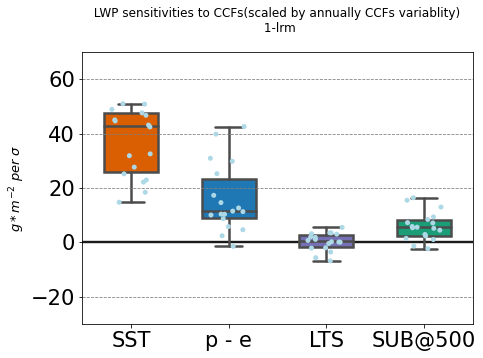

In [10]:
## PLot 3: seaborn coefficience plot for 1-lrm:
fig = plt.figure(figsize = (7, 5))
ax  = fig.add_subplot(111)

parameters = {'axes.labelsize': 23, 'legend.fontsize': 13,
          'axes.titlesize': 12, 'xtick.labelsize':17, 'ytick.labelsize':17}
plt.rcParams.update(parameters)


d1 = {'col1': arange(0, 18*4), 'value': stcoef1.ravel(), 'CCFs': array(['SST', 'p - e', 'LTS', 'SUB@500']*18)}
# print(arange(0, 18*4).reshape(-1,1), d, (array(['SST', 'p-e', 'LTS', 'SUB@500']*18)).reshape(-1,1))
data1  = pd.DataFrame(data=d1, index=arange(0, 18*4))

d2 = {'col1': arange(0, 18*4), 'value': stcoef2.ravel(), 'CCFs': array(['SST', 'p - e', 'LTS', 'SUB@500']*18)}
data2  = pd.DataFrame(data=d2, index=arange(0, 18*4))

# sns.boxplot(data=[d for d in stcoef1.T])

# plot1 = sns.boxplot(data=[f for f in stcoef1.T])
# sns.boxplot(data=[[stcoef1[:,0], stcoef1[:,1], stcoef1[:,2], stcoef1[:,3]], ['dLWP/d(SST)', 'dLWP/d(p-e)','dLWP/d(LTS)', 'dLWP/d(SUB)']])
# plot2 = sns.boxplot(data=[y for y in stcoef1_yr.T])


sns.set_theme(style="whitegrid")
bplot = sns.boxplot(x='CCFs', y='value', data=d1, width = 0.55, linewidth = 2.5)
stplot = sns.stripplot(x='CCFs',  y ='value', data=d1, color="lightblue", jitter=0.2, size = 5)
# print(d1, d2)
# print(stcoef1)
# Plot setting
plt.ylim(-30., 70.)
ax.axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax.axhline(-20., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(20., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(40., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.axhline(60., c = 'gray', linestyle = '--', linewidth = 0.8)
ax.set_ylabel(r"$ g*m^{-2}\ per\ \sigma $", fontsize = 13)

at = ax.set_title(" LWP sensitivities to CCFs(scaled by annually CCFs variablity) \n 1-lrm", pad = 20)
# at.set_position([.5, 1.90])

# Hex code for each CCF's color
CCFs = ['SST', 'p - e', 'LTS', 'SUB@500']
CCFs_colors = ["#d95f02", "#1f78b4", "#7570b3", "#1b9e77"]

color_dict = dict(zip(CCFs, CCFs_colors))

for i in range(0,4):
    mybox = bplot.artists[i]
    mybox.set_facecolor(color_dict[CCFs[i]])


# tips = sns.load_dataset("tips")

# print(tips)

# plt.savefig("plot3_1lrm_Coefficients(monthly)", dpi= 500)



In [12]:
## PLot 3: coefficient plot for 0k 4-lrm

# calc data (monthly) standard deviation:

sigma3 = full((len(deck2), 4), 0.0)
sigma4 = full((len(deck2), 4), 0.0)
sigma5 = full((len(deck2), 4), 0.0)
sigma6 = full((len(deck2), 4), 0.0)

coef3 =  []
coef4 =  []
coef5 =  []
coef6 =  []

stcoef3  = full((len(deck2), 4), 0)
stcoef4  = full((len(deck2), 4), 0)
stcoef5  = full((len(deck2), 4), 0)
stcoef6  = full((len(deck2), 4), 0)


# start calculating SD of CCFs on monthly scale:
for i in range(len(deck_nas2)):
    
    ind1_4lrm = isnan(output_4lrm_flavra_PI[deck_nas2[i]]['LTS'])==False

    ind_true_4lrm = nonzero(ind1_4lrm==True)
    ind_false_4lrm = nonzero(ind1_4lrm==False)
    
    # print('shape2: ', array(ind_true_4lrm).shape)        # shape2
    
    
    
    ## TR_sst, TR_sub
    folder_4lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test6)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_4lrm)
    index_st_sst = folder_4lrm[0].index('fit') +4
    index_ed_sst = folder_4lrm[0].index('K')
    # print(list(folder_4lrm[0])[index_st_sst], list(folder_4lrm[0])[index_ed_sst])
    
    index_st_sub  = folder_4lrm[0].index('_ud') +4
    index_ed_sub  = folder_4lrm[0].index('_dats')
    TR_sst = float(str(folder_4lrm[0])[index_st_sst:index_ed_sst])
    TR_sub = float(str(round(float(str(folder_4lrm[0][index_st_sub:index_ed_sub])) *0.01, 5)))
    # print('TR_sst= ', TR_sst)
    # print('TR_sub= ', TR_sub)
    
    
    
    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sstlt_up =  nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] < TR_sst) & (output_4lrm_flavra_PI[deck_nas2[i]]['SUB'] <= TR_sub))
    ind_sstle_up =  nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] >= TR_sst) & (output_4lrm_flavra_PI[deck_nas2[i]]['SUB']<= TR_sub))
    ind_sstlt_dw  = nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] < TR_sst) &  (output_4lrm_flavra_PI[deck_nas2[i]]['SUB']> TR_sub))
    ind_sstle_dw  = nonzero((output_4lrm_flavra_PI[deck_nas2[i]]['SST'] >= TR_sst) & (output_4lrm_flavra_PI[deck_nas2[i]]['SUB']> TR_sub))
    # print(ind_sstle_up)
    # print(ind_sstlt_dw)

    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7  = intersect1d(ind_true_4lrm, ind_sstlt_up)
    
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8 = intersect1d(ind_true_4lrm, ind_sstle_up)
    # print(ind_true_4lrm)

    # shape9:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 > TR_sub
    ind9  = intersect1d(ind_true_4lrm, ind_sstlt_dw)
    
    # shape10:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 > TR_sub                                                                         
    ind10 =  intersect1d(ind_true_4lrm, ind_sstle_dw)
    

    ## calc standard_deviation for CCFs at PI:
    
    sigma3[i,:]  = array([ nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind7]), nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind7]), 
                          nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind7]), nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind7])]) 
    sigma4[i,:]  = array([ nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind8]), nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind8]), 
                          nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind8]), nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind8])])
    sigma5[i,:]  = array([ nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind9]), nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind9]), 
                          nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind9]), nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind9])])
    sigma6[i,:]  = array([ nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['SST'][ind10]), nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['p_e'][ind10]), 
                          nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['LTS'][ind10]),  nanstd(output_4lrm_flavra_PI[deck_nas2[i]]['SUB'][ind10])])
    

## switch 'nan' points to 0
ind_sg3 = isnan(sigma3)== True
ind_sg3false = nonzero(ind_sg3==True)
sigma3[ind_sg3false] = 0.0

ind_sg5 = isnan(sigma5)== True
ind_sg5false = nonzero(ind_sg5==True)
sigma5[ind_sg5false] = 0.0
# print(sigma3, sigma6)

# Retrieved the 4-lrm coefficients:
for j in range(len(deck2)):
    m  = output_LRM_sstlt_up[deck_nas2[j]][0].copy()
    t  = output_LRM_sstle_up[deck_nas2[j]][0].copy()
    e  = output_LRM_sstlt_down[deck_nas2[j]][0].copy()
    f  = output_LRM_sstle_down[deck_nas2[j]][0].copy()
    
    # print(m, t, e, f)
    coef3.append(array(m))
    coef4.append(array(t))
    coef5.append(array(e))
    coef6.append(array(f))
print( array(coef3), array(coef6) )

stcoef3 = (1000.*array(coef3)) * sigma3[i,:]
stcoef4 = (1000.*array(coef4)) * sigma4[i,:]
stcoef5 = (1000.*array(coef5)) * sigma5[i,:]
stcoef6 = (1000.*array(coef6)) * sigma6[i,:]
print(stcoef5)

['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/BCC-ESM1_best(test6)fit_270.46K_ud-0.2_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CanESM5_best(test6)fit_256.87K_ud-0.8_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2_best(test6)fit_269.42K_ud0.6_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2-FV2_best(test6)fit_269.39K_ud2.3_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2-WACCM_best(test6)fit_269.5K_ud1.0_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CNRM-ESM2-1_best(test6)fit_269.85K_ud-1.0_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/GISS-E2-1-G_best(test6)fit_273.87K_ud-0.1_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/GISS-E2-1-H_best(test6)fit_272.76K_ud0.8_dats.npz']
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/IPSL-CM6A-LR_best(test6)fit_265.92K_ud-0.2_dats.npz']
['/glade/work/chuyan/Research

In [13]:
# calc ANNUALLY data standard deviation:

sigma3_yr = full((len(deck2), 4), 0.0)
sigma4_yr = full((len(deck2), 4), 0.0)
sigma5_yr = full((len(deck2), 4), 0.0)
sigma6_yr = full((len(deck2), 4), 0.0)


stcoef3_yr = full((len(deck2), 4), 0)
stcoef4_yr = full((len(deck2), 4), 0)
stcoef5_yr = full((len(deck2), 4), 0)
stcoef6_yr = full((len(deck2), 4), 0)


# start calculating SD of CCFs on annually scale:
for i in range(len(deck_nas2)):
    
    ind1_4lrm_yr = isnan(output_4lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'].flatten()) == False

    ind_true_4lrm_yr = nonzero(ind1_4lrm_yr ==True)
    ind_false_4lrm_yr = nonzero(ind1_4lrm_yr ==False)
    
    print('shape1v.s2: ', array(ind1_4lrm_yr).shape, array(ind_true_4lrm_yr).shape )        # shape2
    
    
    
    ## TR_sst, TR_sub
    folder_4lrm =  glob.glob(path1+deck2[i]['modn']+'_best(test6)fit_'+'*K'+'_ud'+'*'+'_dats.npz')
    print(folder_4lrm)
    index_st_sst = folder_4lrm[0].index('fit')+ 4
    index_ed_sst = folder_4lrm[0].index('K')
    # print(list(folder_4lrm[0])[index_st_sst], list(folder_4lrm[0])[index_ed_sst])
    
    index_st_sub  = folder_4lrm[0].index('_ud') +4
    index_ed_sub  = folder_4lrm[0].index('_dats')
    TR_sst = float(str(folder_4lrm[0])[index_st_sst:index_ed_sst])
    TR_sub = float(str(round(float(str(folder_4lrm[0][index_st_sub:index_ed_sub])) *0.01, 5)))
    # print('TR_sst= ', TR_sst)
    # print('TR_sub= ', TR_sub)
    
    
    
    #..Split data points with skin Temperature < / >=TR_sst and Subsidence500 <= / > TR_sub(upward motion / downward motion): 
    
    # shape1 split into shape3(smaller.TR_sst & up)\shape4(larger.equal.TR_sst & up)\shape5(smaller.TR_sst & down)\shape7(larger.equal.TR_sst & down)
    ind_sstlt_up_yr =  nonzero((output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten() < TR_sst) & (output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten() <= TR_sub))
    ind_sstle_up_yr =  nonzero((output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten() >= TR_sst) & (output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten()<= TR_sub))
    ind_sstlt_dw_yr  = nonzero((output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten() < TR_sst) &  (output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten() > TR_sub))
    ind_sstle_dw_yr  = nonzero((output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten() >= TR_sst) & (output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten()> TR_sub))
    # print(ind_sstle_up_yr)
    # print(ind_sstlt_dw_yr)

    # shape7:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 <= TR_sub
    ind7_yr  = intersect1d(ind_true_4lrm_yr, ind_sstlt_up_yr)
    
    # shape8:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 <= TR_sub
    ind8_yr = intersect1d(ind_true_4lrm_yr, ind_sstle_up_yr)
    # print(ind8_yr)

    # shape9:the intersection of places where has LTS value and skin_T < TR_sst & SUB500 > TR_sub
    ind9_yr  = intersect1d(ind_true_4lrm_yr, ind_sstlt_dw_yr)
    
    # shape10:the intersection of places where LTS value and skin_T >= TR_sst & SUB500 > TR_sub                                                                         
    ind10_yr =  intersect1d(ind_true_4lrm_yr, ind_sstle_dw_yr)
    # print(ind10_yr)

    ## calc standard_deviation for CCFs at PI:
    
    sigma3_yr[i,:]  = array([ nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten()[ind7_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'].flatten()[ind7_yr]), 
                          nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'].flatten()[ind7_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten()[ind7_yr])]) 
    sigma4_yr[i,:]  = array([ nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten()[ind8_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'].flatten()[ind8_yr]), 
                          nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'].flatten()[ind8_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten()[ind8_yr])])
    sigma5_yr[i,:]  = array([ nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten()[ind9_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'].flatten()[ind9_yr]), 
                          nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'].flatten()[ind9_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten()[ind9_yr])])
    sigma6_yr[i,:]  = array([ nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SST_yr_bin'].flatten()[ind10_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['p_e_yr_bin'].flatten()[ind10_yr]), 
                          nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['LTS_yr_bin'].flatten()[ind10_yr]), nanstd(output_4lrm_yr_bin_PI[deck_nas2[i]]['SUB_yr_bin'].flatten()[ind10_yr])])
    

## switch 'nan' points to 0
ind_sg3_yr = isnan(sigma3_yr)== True
ind_sg3false_yr = nonzero(ind_sg3_yr==True)
sigma3_yr[ind_sg3false_yr] = 0.0

ind_sg5_yr = isnan(sigma5_yr)== True
ind_sg5false_yr = nonzero(ind_sg5_yr==True)
sigma5_yr[ind_sg5false_yr] = 0.0
print(sigma3_yr, sigma6_yr)


stcoef3_yr = (1000.*array(coef3)) * sigma3_yr[i,:]
stcoef4_yr = (1000.*array(coef4)) * sigma4_yr[i,:]
stcoef5_yr = (1000.*array(coef5)) * sigma5_yr[i,:]
stcoef6_yr = (1000.*array(coef6)) * sigma6_yr[i,:]
print(stcoef5_yr)

shape1v.s2:  (72270,) (1, 72270)
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/BCC-ESM1_best(test6)fit_270.46K_ud-0.2_dats.npz']
shape1v.s2:  (72270,) (1, 72270)
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CanESM5_best(test6)fit_256.87K_ud-0.8_dats.npz']
shape1v.s2:  (72270,) (1, 66527)
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2_best(test6)fit_269.42K_ud0.6_dats.npz']
shape1v.s2:  (72270,) (1, 66064)
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2-FV2_best(test6)fit_269.39K_ud2.3_dats.npz']
shape1v.s2:  (72270,) (1, 66530)
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CESM2-WACCM_best(test6)fit_269.5K_ud1.0_dats.npz']
shape1v.s2:  (72270,) (1, 68199)
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/CNRM-ESM2-1_best(test6)fit_269.85K_ud-1.0_dats.npz']
shape1v.s2:  (72270,) (1, 67095)
['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test1/GISS-E2-1-G_best(test6)fit_273.87K_ud-0.1_dats.npz']
shape1v.s2:  (7227

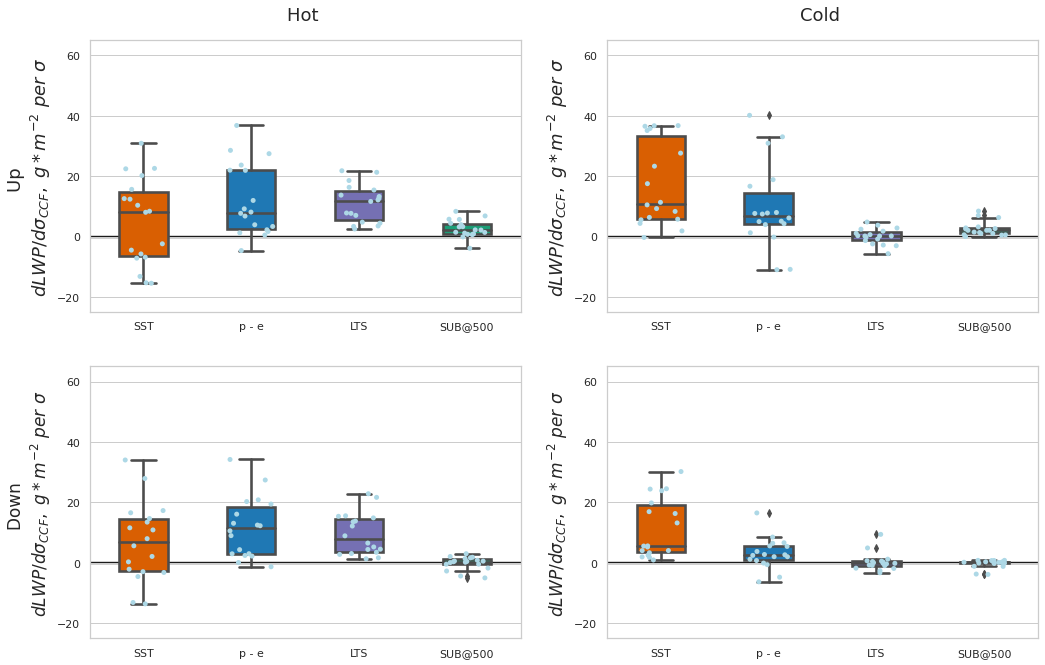

<Figure size 432x288 with 0 Axes>

In [14]:
## PLot 3: seaborn coefficience plot for best 4-lrm:

fig7, ax7 = plt.subplots(2, 2, figsize = (17, 11))

parameters = {'axes.labelsize': 22, 'legend.fontsize': 12,
          'axes.titlesize': 11, 'xtick.labelsize':15, 'ytick.labelsize':16}
plt.rcParams.update(parameters)

# Data Frame:

d1 = {"col1": arange(0, 18*4), "value": stcoef3.ravel(), "CCFs": array(['SST', 'p - e', 'LTS', 'SUB@500']*18)}
# print(arange(0, 18*4).reshape(-1,1), d, (array(['SST', 'p-e', 'LTS', 'SUB@500']*18)).reshape(-1,1))
data1  = pd.DataFrame(data=d1, index=arange(0, 18*4))

d2 = {"col1": arange(0, 18*4), "value": stcoef4.ravel(), "CCFs": array(['SST', 'p - e', 'LTS', 'SUB@500']*18)}
data2  = pd.DataFrame(data=d2, index=arange(0, 18*4))

d3 = {"col1": arange(0, 18*4), "value": stcoef5.ravel(), "CCFs": array(['SST', 'p - e', 'LTS', 'SUB@500']*18)}
# print(arange(0, 18*4).reshape(-1,1), d, (array(['SST', 'p-e', 'LTS', 'SUB@500']*18)).reshape(-1,1))
data3  = pd.DataFrame(data=d3, index=arange(0, 18*4))

d4 = {"col1": arange(0, 18*4), "value": stcoef6.ravel(), "CCFs": array(['SST', 'p - e', 'LTS', 'SUB@500']*18)}
data2  = pd.DataFrame(data=d4, index=arange(0, 18*4))

bplot1 = sns.boxplot(ax=ax7[0,1], x ="CCFs", y="value", data=d1, width = 0.45, linewidth = 2.6, whis =2.0)
stplot1 = sns.stripplot(ax=ax7[0,1], x="CCFs", y ="value", data=d1, color="lightblue", jitter=0.2,size = 5)
ax7[0,1].set_title("Cold ", loc = 'center', fontsize = 18, pad =20)

ax7[0,1].set_ylim([-25, 65])

bplot2 = sns.boxplot(ax=ax7[0,0], x ="CCFs", y="value", data=d2, width = 0.45, linewidth = 2.6, whis =2.0)
stplot2 = sns.stripplot(ax=ax7[0,0], x="CCFs", y ="value", data=d2,  color="lightblue", jitter=0.2,size = 5)
ax7[0,0].set_title("Hot ", loc = 'center', fontsize = 18, pad =20)

ax7[0,0].set_ylim([-25, 65])


bplot3 = sns.boxplot(ax=ax7[1,1], x ="CCFs", y="value", data=d3, width = 0.45, linewidth = 2.6, whis =2.0)
stplot3 = sns.stripplot(ax=ax7[1,1], x="CCFs", y ="value", data=d3, color="lightblue", jitter=0.2,size = 5)
# ax7[1,1].set_title("Cold ", loc = 'center')

ax7[1,1].set_ylim([-25, 65])

bplot4 = sns.boxplot(ax=ax7[1,0], x ="CCFs", y="value", data=d4, width = 0.45, linewidth = 2.6, whis =2.0)
stplot4 = sns.stripplot(ax=ax7[1,0], x="CCFs", y ="value", data=d4, color="lightblue",jitter=0.2,size = 5)
# ax7[1,0].set_title(" Hot ", loc = 'center')

ax7[1,0].set_ylim([-25, 65])

# Plot setting
ax7[0,0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax7[0,1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax7[1,0].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax7[1,1].axhline(0., c = 'k', linestyle = '-', linewidth = 2.4, zorder=0)
ax7[0,0].set_ylabel("Up \n" + r"$dLWP/d\sigma_{CCF},\ g*m^{-2}\ per\ \sigma $", fontsize = 18)
ax7[1,0].set_ylabel("Down \n" + r"$dLWP/d\sigma_{CCF},\ g*m^{-2}\ per\ \sigma $", fontsize = 17)
ax7[0,1].set_ylabel(r"$dLWP/d\sigma_{CCF},\ g*m^{-2}\ per\ \sigma $", fontsize = 18)
ax7[1,1].set_ylabel(r"$dLWP/d\sigma_{CCF},\ g*m^{-2}\ per\ \sigma $", fontsize = 17)

# at = ax.set_title(" LWP sensitivities to CCFs(scaled by annually CCFs variablity) \n 1-lrm", pad = 20)
# at.set_position([.5, 1.90])

# Hex code for each CCF's color
CCFs = ['SST', 'p - e', 'LTS', 'SUB@500']
CCFs_colors = ["#d95f02", "#1f78b4", "#7570b3", "#1b9e77"]

color_dict = dict(zip(CCFs, CCFs_colors))

for i in range(0,4):
    mybox1 = bplot1.artists[i]
    mybox1.set_facecolor(color_dict[CCFs[i]])
    
    mybox2 = bplot2.artists[i]
    mybox2.set_facecolor(color_dict[CCFs[i]])
    mybox3 = bplot3.artists[i]
    mybox3.set_facecolor(color_dict[CCFs[i]])
    mybox4 = bplot4.artists[i]
    mybox4.set_facecolor(color_dict[CCFs[i]])
    

sns.set_style("darkgrid", {"grid.color": "gray", "grid.linestyle": ":"})
# sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
# plt.savefig("plot7_bestfit6_Coefficient_subPlots(monthly)", dpi = 500)

plt.show()
plt.clf()

(1322760,) (1322760,)


No handles with labels found to put in legend.
No handles with labels found to put in legend.


(-100.0, 700.0)

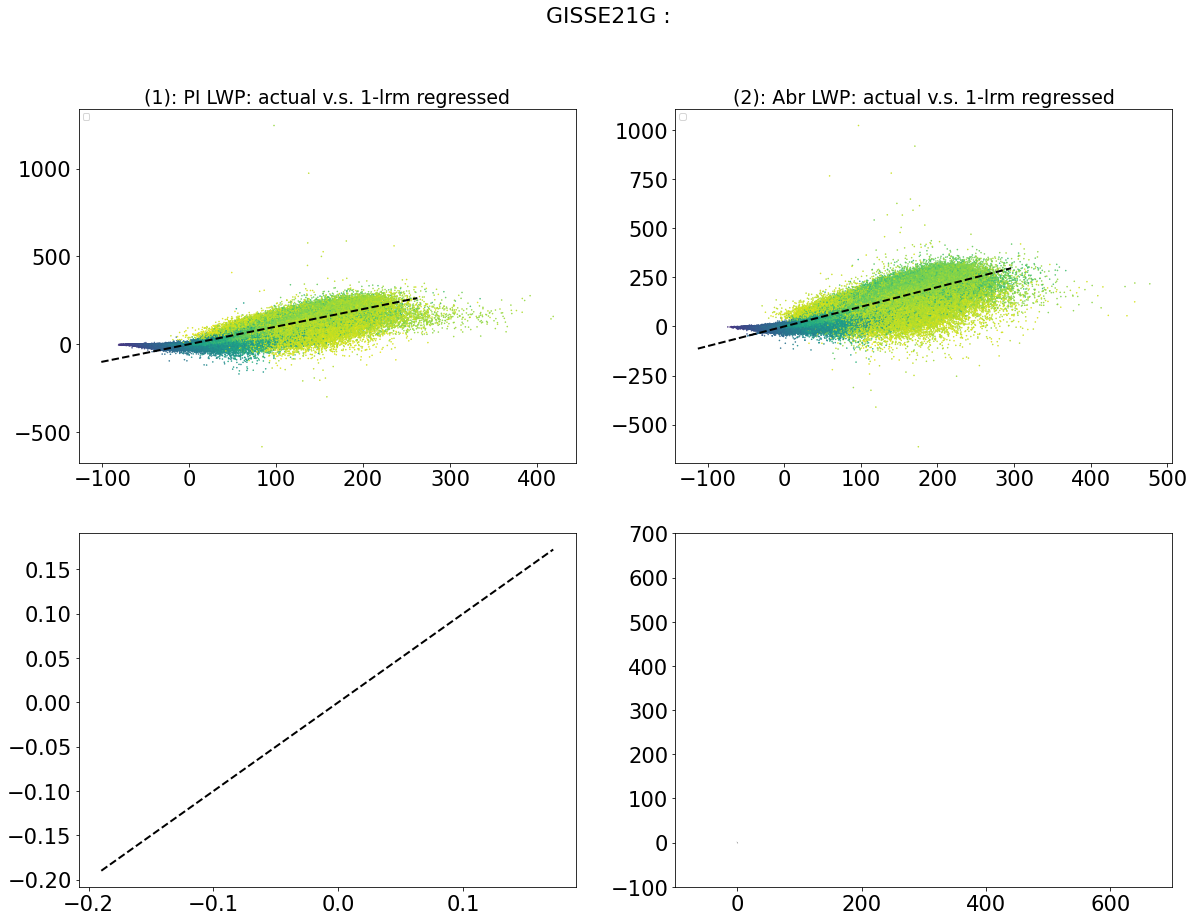

In [73]:
# PLot 4

output_yrs = {}
output_2lrm_GMT = {}

fig4, ax4 = plt.subplots(2, 2, figsize =(19.6, 14.3))   #(16.2, 9.3))

parameters = {'axes.labelsize': 23, 'legend.fontsize': 15,
          'axes.titlesize': 19, 'xtick.labelsize': 21, 'ytick.labelsize':21}
plt.rcParams.update(parameters)

a=6
my_colors= array([
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])   #..plt.rcParams['axes.prop_cycle']()
my_colorst= my_colors

# actual & regressed MONTHLY LWP data: 
PI_2lrm_actual  = array(output_2lrm_flavra_PI[deck_nas2[a]]['LWP'])
abr_2lrm_actual  = array(output_2lrm_flavra_abr[deck_nas2[a]]['LWP'])
PI_2lrm_predict  =  array(output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[a]]).flatten()
abr_2lrm_predict  =  array(output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[a]]).flatten()

print(abr_2lrm_predict.shape, abr_2lrm_actual.shape)


# d(LWP) from pi to abr-4x:
dabrmpi_2lrm_actual_whole = (array(output_2lrm_mon_bin_abr[deck_nas2[a]]['LWP_mon_bin'][0:150, :,:]) - nanmean(array(output_2lrm_mon_bin_PI[deck_nas2[a]]['LWP_mon_bin']))).flatten()
dabrmpi_2lrm_predict_whole = (array(output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[a]][0:150,:,:]) - nanmean(array(output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[a]]))).flatten()
dabrmpi_2lrm_actual_f50 = (array(output_2lrm_mon_bin_abr[deck_nas2[a]]['LWP_mon_bin'][0:15, :,:]) - nanmean(array(output_2lrm_mon_bin_PI[deck_nas2[a]]['LWP_mon_bin']))).flatten()
dabrmpi_2lrm_predict_f50 = (array(output_2lrm_mon_bin_LWPpredi_abr[deck_nas[a]][0:15,:,:]) - nanmean(array(output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[a]]))).flatten()


output_yrs[deck_nas2[a]]  = arange(shape_yr_modelPI[deck_nas2[a]] + shape_yr_modelabr[deck_nas2[a]])
# GMT = output_GMT[deck_nas2[a]][0:249]
Yrs = output_yrs[deck_nas2[a]][0:249]


ax4[0,1].scatter(1000.*abr_2lrm_predict,  1000.*abr_2lrm_actual,  c =array(output_2lrm_flavra_abr[deck_nas2[a]]['SST']), s= 0.3)
                 #label= deck_nas[a] + f"actual v.s. 2lrm predict:\n TR_sst= {TR_sst}K, TR_sub = {TR_sub}Pa s-1")
                 #label= deck_nas2[a] + f"actual v.s. 2lrm predict:\n TR_sst= " + "K")
ax4[0,0].scatter(1000.*PI_2lrm_predict,  1000.*PI_2lrm_actual,  c = array(output_2lrm_flavra_PI[deck_nas2[a]]['SST']), s = 0.3)
                 #label= deck_nas[a] + f"actual v.s. 2lrm predict:\n TR_sst= {TR_sst}K, TR_sub = {TR_sub}Pa s-1")
                 #label= deck_nas2[a] + f"actual v.s. 2lrm predict:\n TR_sst= " + "K")

# ax4[1,1].scatter(1000.*dabrmpi_2lrm_predict_whole, 1000.*dabrmpi_2lrm_actual_whole, c = 'g', s =0.2)
#                  #label = deck_nas[a] + 'actual v.s. 2lrm predict dLWP |(whole 150 yrs)'+ f" \n 2lrm: TR_sst= {TR_sst}K")
# ax4[1,0].scatter(1000.*dabrmpi_2lrm_predict_f50, 1000.*dabrmpi_2lrm_actual_f50,  c = 'g', s = 0.2)
#                  #label =deck_nas[a] + 'actual v.s. 2lrm predict dLWP |(first 15 yrs)'+ f" \n 2lrm: TR_sst= {TR_sst}K, TR_sub = {TR_sub}Pa s-1")


# Reference line added:
x1  = linspace(nanpercentile(1000.*abr_2lrm_actual, 0.01)- 20, nanpercentile(1000.*abr_2lrm_actual, 99)+ 50,  50)
y1  = x1
x2  = linspace(nanpercentile(1000.*PI_2lrm_actual, 0.01)-20, nanpercentile(1000.*PI_2lrm_actual, 99)+ 50,  50)
y2  = x2
x3  = linspace(nanpercentile(dabrmpi_2lrm_actual_whole, 0.01)-0.02, nanpercentile(dabrmpi_2lrm_actual_whole, 99)+0.03, 50)
y3  = x3
x4  = linspace(nanpercentile(dabrmpi_2lrm_actual_f50, 0.01)-0.02, nanpercentile(dabrmpi_2lrm_actual_f50, 99)+0.03, 50)
y4  = x4

ax4[0,0].plot(x2, y2, color= 'k', linewidth =2., linestyle = '--')
ax4[0,1].plot(x1, y1, color= 'k', linewidth =2., linestyle = '--')
ax4[1,0].plot(x4, y4, color= 'k', linewidth =2., linestyle = '--')
ax4[1,1].plot(x3, y3, color= 'k', linewidth =2., linestyle = '--')

# ax4[1,0].set_xlabel(" Regressed dLWP, "+r"$kg/ m^{-2}$")
# ax4[1,0].set_ylabel(" Actual dLWP, "+ r"$kg/ m^{-2}$")

# ax4[1,1].set_xlabel(" Regressed dLWP, "+r"$kg/ m^{-2}$")
# ax4[1,1].set_ylabel(" Actual dLWP, "+ r"$kg/ m^{-2}$")

ax4[0,0].set_title("(1): PI LWP: actual v.s. 1-lrm regressed")
ax4[0,1].set_title("(2): Abr LWP: actual v.s. 1-lrm regressed")
# ax4[1,0].set_title("dLWP|abr- mean(PI), (first 15 yrs): actual v.s. 1-lrm regressed")
# ax4[1,1].set_title("dLWP|abr- mean(PI), (whole 150 yrs): actual v.s. 1-lrm regressed")
plt.suptitle(deck_nas2[a] +" :", fontsize = 22)

ax4[0,0].legend(loc='upper left', fontsize= 8)  #.loc='best', bbox_to_anchor=(-0.55, 0.38, 0.5, 0.63)
ax4[0,1].legend(loc='upper left', fontsize= 8)
# ax4[1,0].legend(loc='upper left', fontsize= 8)
# ax4[1,1].legend(loc='upper left', fontsize= 8)

plt.xlim(-100., 700.)
plt.ylim(-100., 700.)

#.. plot
#..plt.savefig("Actual&RegressedValues_"+ deck_nas[a]+ "_1LRM_" +str(round(TR_sst))+'K', dpi= 100)
# plt.savefig("Actual&RegressedValues_"+ deck_nas2[a]+ "_1LRM_" + 'Bestfit3', dpi= 100)

(2628000,) (2628000,)


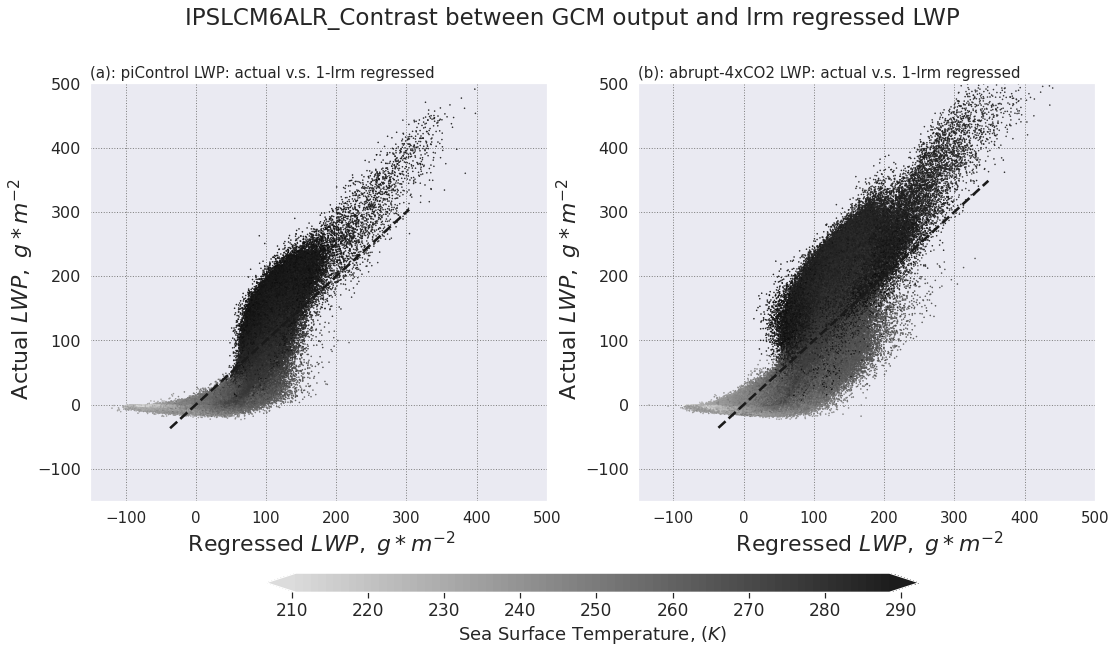

In [15]:
# PLot 4

# for a in range(len(deck2)):
    

fig4, ax4 = plt.subplots(1, 2, figsize = (18., 10.6))   #(16.2, 9.3))

parameters = {'axes.labelsize': 18, 'legend.fontsize': 15,
          'axes.titlesize': 15, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)

my_colors= array([
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a',
    '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94',
    '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d',
    '#17becf', '#9edae5'])   #..plt.rcParams['axes.prop_cycle']()
my_colorst= my_colors
a =8
# actual & regressed MONTHLY LWP data: 
PI_2lrm_actual  = array(output_2lrm_flavra_PI[deck_nas2[a]]['LWP'])
abr_2lrm_actual  = array(output_2lrm_flavra_abr[deck_nas2[a]]['LWP'])
PI_2lrm_predict  =  array(output_2lrm_mon_bin_LWPpredi_PI[deck_nas2[a]]).flatten()
abr_2lrm_predict  =  array(output_2lrm_mon_bin_LWPpredi_abr[deck_nas2[a]]).flatten()

print(abr_2lrm_predict.shape, abr_2lrm_actual.shape)


cax_1 = ax4[1].scatter(1000.*abr_2lrm_predict,  1000.*abr_2lrm_actual,  c = array(output_2lrm_flavra_abr[deck_nas2[a]]['SST']), s= 0.3, cmap= 'gist_yarg',label= deck_nas2[a] + f"actual\ v.s.\ 1-lrm\ regressed ")


cax_0 = ax4[0].scatter(1000.*PI_2lrm_predict,  1000.*PI_2lrm_actual,  c = array(output_2lrm_flavra_PI[deck_nas2[a]]['SST']), s = 0.3, cmap= 'gist_yarg', label= deck_nas2[a] + f"actual\ v.s.\ 1-lrm\ regressed ")

fig4.colorbar(cax_1, ax = [ax4[0], ax4[1]], label ="Sea Surface Temperature," + r"$\ (K)$", orientation='vertival', extend='both', pad = 0.0625, shrink = 0.86, aspect=31, 
             values = arange(210., 290., 1.))   #.. viridis_r
# cb1.set_ticks(array([210., 220., 230., 240., 260., 275., 290.]))
# cb1.set_ticklabels([210, 220, 230, 240, 260, 270, 275, 290])


# Reference line added:
x1  = linspace(nanpercentile(1000.*abr_2lrm_actual, 0.01)- 20., nanpercentile(1000.*abr_2lrm_actual, 99)+100., 50)
y1  = x1
x2  = linspace(nanpercentile(1000.*PI_2lrm_actual, 0.01)- 20., nanpercentile(1000.*PI_2lrm_actual, 99)+100., 50)
y2  = x2



ax4[0].plot(x2, y2, color= 'k', linewidth =2.6, linestyle = '--')
ax4[1].plot(x1, y1, color= 'k', linewidth =2.6, linestyle = '--')

ax4[0].set_xlabel(" Regressed "+r"$LWP,\ g*m^{-2}$")
ax4[0].set_ylabel(" Actual "+ r"$LWP,\ g*m^{-2}$", labelpad= 0.65)

ax4[1].set_xlabel(" Regressed "+r"$LWP,\ g*m^{-2}$")
ax4[1].set_ylabel(" Actual "+ r"$LWP,\ g*m^{-2}$", labelpad= 0.525)

ax4[0].set_title("(a): piControl LWP: actual v.s. 1-lrm regressed", loc = 'left')
ax4[1].set_title("(b): abrupt-4xCO2 LWP: actual v.s. 1-lrm regressed", loc = 'left')

plt.suptitle(deck_nas2[a] + "_Contrast between GCM output and lrm regressed LWP ", fontsize = 23)
ax4[0].set_xlim([-150., 500.])
ax4[0].set_ylim([-150., 500.])
ax4[1].set_xlim([-150., 500.])
ax4[1].set_ylim([-150., 500.])
ax4[0].set_xticks([-100., 0., 100., 200., 300., 400., 500.])
ax4[1].set_xticks([-100, 0, 100, 200, 300, 400, 500])


#.. plot
#..plt.savefig("Actual&RegressedValues_"+ deck_nas[a]+ "_1LRM_" +str(round(TR_sst))+'K', dpi= 100)

plt.savefig("plot4_ActualvsRegressed_LWP", dpi = 500)


##: add 2 polyfit line for group_1: SST<240K and points group_2: SST>= 240K

['/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/IPSLCM6ALR__STAT_pi+abr_22x_31y.npz']
[0.01553749 0.01565184 0.01576618 0.01588053 0.01599487 0.01610922
 0.01622356 0.01633791 0.01645225 0.0165666  0.01668094 0.01679529
 0.01690963 0.01702398 0.01713832 0.01725267 0.01736701 0.01748136
 0.0175957  0.01771005 0.01782439 0.01793874 0.01805308 0.01816743
 0.01828177 0.01839612 0.01851046 0.01862481 0.01873915 0.0188535
 0.01896784 0.01908219 0.01919653 0.01931088 0.01942522 0.01953957
 0.01965391 0.01976826 0.0198826  0.01999695 0.02011129 0.02022564
 0.02033998 0.02045433 0.02056867 0.02068302 0.02079736 0.02091171
 0.02102605 0.0211404  0.02125474 0.02136909 0.02148343 0.02159778
 0.02171212 0.02182647 0.02194081 0.02205516 0.0221695  0.02228385
 0.02239819 0.02251254 0.02262688 0.02274123 0.02285557 0.02296992
 0.02308426 0.02319861 0.02331295 0.0234273  0.02354164 0.02365599
 0.02377033 0.02388468 0.02399902 0.02411337 0.02422771 0.02434206
 0.0244564  0.02457075 0.02468509 0

TypeError: cannot unpack non-iterable AxesSubplot object

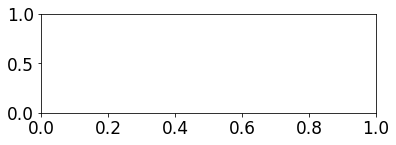

In [9]:
## PLot 5:

modn = 'IPSLCM6ALR'
    
WD = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/plots_test5/'   # Plots_proposal
path6 = '/glade/work/chuyan/Research/Cloud_CCFs_RMs/Plots_proposal/'

folder =  glob.glob(WD+ modn+'__'+ 'STAT_pi+abr_'+'22x_31y'+'.npz')
print(folder)

output_ARRAY  =  load(folder[0], allow_pickle=True)  # str(TR_sst)
x_gcm      =   array(output_ARRAY['bound_x'])
y_gcm      =   array(output_ARRAY['bound_y'])
output_stat1   = output_ARRAY['stats_1']
output_stat2   = output_ARRAY['stats5']

#..defined a proper LWP ticks within its range
p10_valuespace1 = nanpercentile(output_stat1, 25.) - nanpercentile(output_stat1, 15.)
levels_value1  = linspace(nanpercentile(output_stat1, 1.5)-p10_valuespace1, nanpercentile(output_stat1, 99.5)+p10_valuespace1, 164)# arange(0.368, 0.534, 0.002) 
print(levels_value1)
p10_valuespace2 = nanpercentile(output_stat2, 25.) - nanpercentile(output_stat2, 15.)
levels_value2  = linspace(nanpercentile(output_stat2, 1.5)-p10_valuespace2, nanpercentile(output_stat2, 99.5)+p10_valuespace2, 164)
print(levels_value2)


# plot settings:
parameters = {'axes.labelsize': 15, 'legend.fontsize': 15,
      'axes.titlesize': 15, 'xtick.labelsize': 17, 'ytick.labelsize': 17}
plt.rcParams.update(parameters)


#..print(linspace(nanpercentile(output_stat, 1.5), nanpercentile(output_stat, 99.5), 164))
#..pick the desired colormap
cmap  = plt.get_cmap('YlOrRd') 
cmap_2 = plt.get_cmap('viridis_r')   # 'YlOrRd'
norm1 = BoundaryNorm(levels_value1, ncolors= cmap.N, extend='both')
norm2 = BoundaryNorm(levels_value2, ncolors= cmap_2.N, extend='both')

# subplot3 :
fig1, ax1  = plt.subplot(211)  #(16.2, 9.3))
xiu = arange(0, shape_yr_modelPI[deck_nas[8]]+150)
print(xiu)

output_yrs = {}
for b in range(len(deck_nas2)):
    if deck_nas2[b] == 'IPSLCM6ALR':

        output_yrs[deck_nas2[b]] = arange(0, shape_yr_modelPI[deck_nas2[b]]+150)
        # print(output_yrs[deck_nas2[b]].shape)
        ax1.scatter(output_yrs[deck_nas2[b]][:99], output_report[deck_nas2[b]][:99], label='$LWP_{pi-Control} $', c='b')

        ax1.scatter(output_yrs[deck_nas2[b]][99:249], output_report[deck_nas2[b]][99:249], label='$LWP_{abrupt-4xCO2} $', c= 'r')
        ax1.plot(output_yrs[deck_nas2[b]], output_predict[deck_nas2[b]][:249], "g", label='$aLWP/aX_{pi-Control}*{X_{abrupt-4xCO2}}| $'+'TR_sst = 270.0K')

ax1.set_xlabel('Years')

ax1.set_ylabel('LWP, '+r'$kg *m_{-2}$')
ax1.set_title(" 2LRM in IPSL-CM6A-LR", fontsize=22)  #..!!
# plt.legend( )
#ax1.ylim((0.105, 0.121))

# subplot1 
plt.figure(12, figsize = (19.8, 9.8))
fig3, ax3  = plt.subplot(223)  #(16.2, 9.3))

im2  = ax3.pcolormesh(x_gcm, y_gcm, array(output_stat2), cmap=cmap_2, norm= norm2)
ax3.set_xlabel('SUB at 500mb, '+ r'$Pa\ s^{-1}$')
ax3.set_ylabel('SST, ' + 'K')
ax3.set_title(r"$(a)\ R^{2}(PI\ predict\ with\ PI\ true LWP)$", loc='left', fontsize = 14)
# ax3.set_title("exp 'abrupt-4xCO2' GCM: BCCESM1 predict R_2", loc='left', fontsize = 11)


fig3.colorbar(im2, ax = ax3, label= r"$ Coefficient of Determination$")

# subplot2 
fig4, ax4  = plt.subplot(224)  #(16.2, 9.3))

im1  = ax4.pcolormesh(x_gcm, y_gcm, array(1000.*output_stat1), cmap=cmap, norm= norm1)   #..anmean_LWP_bin_Tskew_wvp..LWP_bin_Tskin_sub
ax4.set_xlabel('SUB at 500mb, '+ r'$Pa\ s^{-1}$')
ax4.set_ylabel('SST, ' + 'K')
ax4.set_title(r"$(b)\ ABS\_bias:(deltaLWP_{pred} - deltaLWP_{GCM})$", loc='left', fontsize = 14)
fig4.colorbar(im1, ax = ax4, label= r"$(g*m^{-2})$")



# plt.suptitle( modn+ " Bias Metrics for USING piControl data Predict abr4xCO2 LWP", fontsize =18)

# plt.legend(loc='upper right',  fontsize= 12)

# plt.savefig(path6+"plot5_model_bias_metrics" + modn, dpi=500)


plt.show()
